<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Dataset-Titanic" data-toc-modified-id="Import-Dataset-Titanic-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Dataset Titanic</a></span><ul class="toc-item"><li><span><a href="#Join-datasets" data-toc-modified-id="Join-datasets-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Join datasets</a></span></li></ul></li><li><span><a href="#Analysis-exploratory-of-the-Dataset-de-treinamento" data-toc-modified-id="Analysis-exploratory-of-the-Dataset-de-treinamento-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analysis exploratory of the Dataset de treinamento</a></span></li><li><span><a href="#Missing-Values" data-toc-modified-id="Missing-Values-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Missing Values</a></span><ul class="toc-item"><li><span><a href="#input-Age" data-toc-modified-id="input-Age-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>input Age</a></span><ul class="toc-item"><li><span><a href="#Input-Age-por-Title-e-Pclasse-,-utilzando-a-Mediana" data-toc-modified-id="Input-Age-por-Title-e-Pclasse-,-utilzando-a-Mediana-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Input Age por Title e Pclasse , utilzando a Mediana</a></span></li></ul></li><li><span><a href="#Input-Cabin" data-toc-modified-id="Input-Cabin-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Input Cabin</a></span></li></ul></li></ul></div>

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#IMAGENS.
from IPython.display import Image as img

#OUTROS.
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

 # Import Dataset Titanic

In [88]:
train_csv= pd.read_csv('train.csv')
test_csv = pd.read_csv('test.csv')

In [100]:
train_csv.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
test_csv.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [89]:
print(train_csv.count() )

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64


In [90]:
print(test_csv.count() )

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64


## Join datasets

In [94]:
titanic_set =  pd.co(objs=[train_csv, test_csv], axis=0).reset_index(drop=True)

AttributeError: module 'pandas' has no attribute 'co'

In [99]:
titanic_set.count()

Age            1046
Cabin           295
Embarked       1307
Fare           1308
Name           1309
Parch          1309
PassengerId    1309
Pclass         1309
Sex            1309
SibSp          1309
Survived        891
Ticket         1309
dtype: int64

In [98]:
titanic_set.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


# Analysis exploratory of the Dataset de treinamento

In [102]:
print('Percentual de Sobreviventes x Não Sobreviventes - ',
       round(train_csv.groupby('Survived').Sex.count()/train_csv.Name.count()*100,2))

Percentual de Sobreviventes x Não Sobreviventes -  Survived
0    61.62
1    38.38
Name: Sex, dtype: float64


In [242]:
print('Missig Values:')
train_csv.isnull().sum()

Missig Values:


PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                 35
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             2
Status_Survived      0
Title                0
dtype: int64

* Cabin e Age são os que mais faltam valores
* Survived são do conjunto de teste, é o que vamos prever, por isso estão nulos

Text(0.5, 1.0, 'Distribution of the field Age')

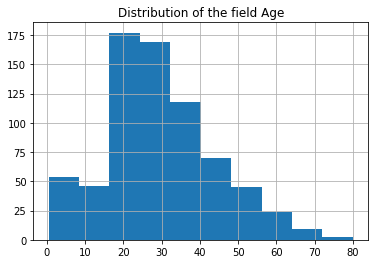

In [104]:
train_csv.Age.hist()
plt.title("Distribution of the field Age")

* there are a concentration of the age between 18 and 35 years

Text(0.5, 1.0, 'Distribution of the field Fare')

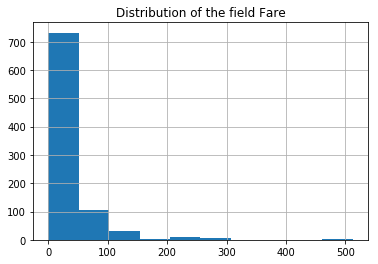

In [105]:
train_csv.Fare.hist()
plt.title("Distribution of the field Fare")

* there are a concentration of the Fare between 0 and 50

# Missing Values

 Com base no valores da feature Age e Cabin, vamos começar por elas o preenchimento dos "Missing Values"

## input Age

Analise exploratoria de Age para encontrar a melhor maneira de inputar os dados

Antes irei Criar uma nova coluna Suvived com Label- "Vivo/Morto"

In [106]:
train_csv.loc[train_csv.Survived==0,'Status_Survived']='Morto'
train_csv.loc[train_csv.Survived==1,'Status_Survived']='Vivo'

In [107]:
train_csv.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status_Survived
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Morto
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Vivo
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Vivo
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Vivo
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Morto


Text(0.5, 1.0, 'Boxplot - Age x Survived')

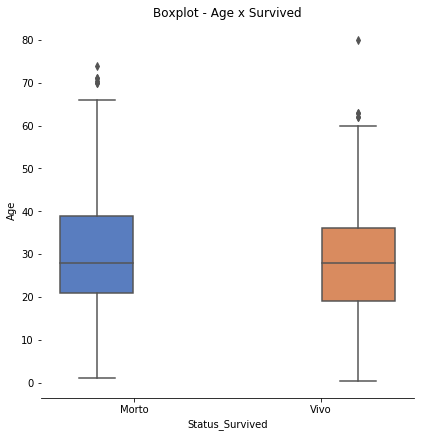

In [113]:
g = sns.factorplot(x="Status_Survived",y="Age", hue ='Status_Survived',data=train_csv,kind="box", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Age")
plt.title('Boxplot - Age x Survived')

Text(0.5, 1.0, 'Boxplot - Age x Survived por Sex')

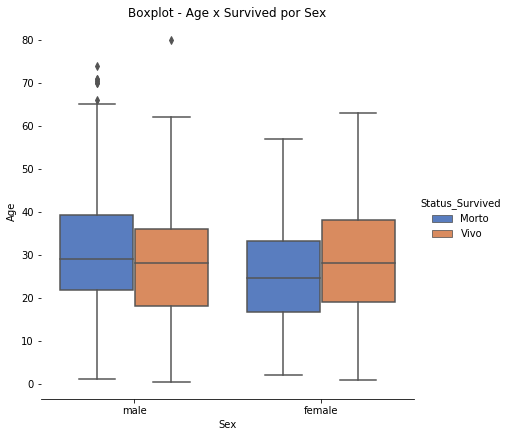

In [115]:
g = sns.factorplot(x="Sex",y="Age", hue ='Status_Survived',data=train_csv,kind="box", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Age")
plt.title('Boxplot - Age x Survived por Sex')

Text(0.5, 1.0, 'Boxplot - Age x Survived por Pclass')

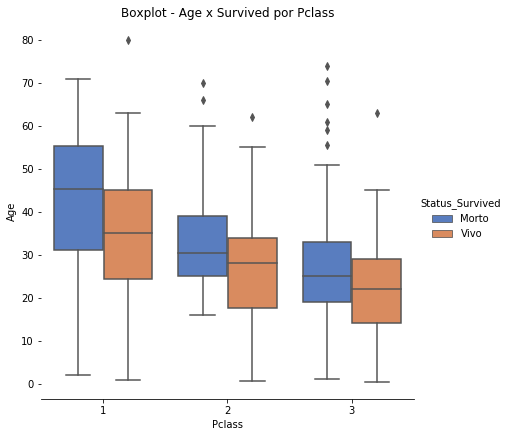

In [116]:
g = sns.factorplot(x="Pclass",y="Age", hue ='Status_Survived',data=train_csv,kind="box", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Age")
plt.title('Boxplot - Age x Survived por Pclass')

* Nitidamente podemos visualizar que conforme nivel Pclass aumenta(menor classe) a idade diminui.
* Conforme visualizações acima Pclass é uma boa feature para inputar Age faltante,ou seja,por Pclass.


Text(0.5, 1.0, 'Boxplot - Age x Pclass por Sex')

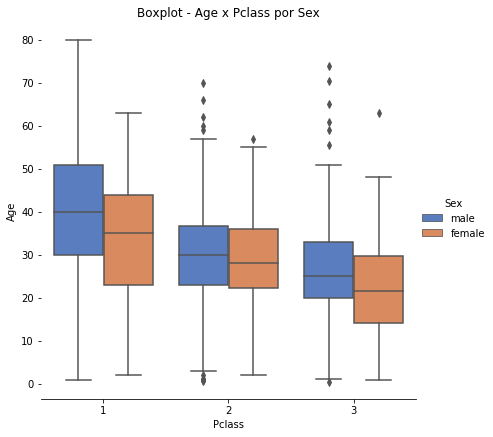

In [119]:
g = sns.factorplot(x="Pclass",y="Age", hue ='Sex',data=train_csv,kind="box", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Age")
plt.title('Boxplot - Age x Pclass por Sex')

* O padrão se mantem mesmo por sexo, não irei utilizar Sexo para inputar idade.

***A Coluna Name também pode nos ajudar, pois nela há titulos, mr, miss, etc***

In [164]:
train_csv['Title']=[i.split(",")[1].split(".")[0].strip() for i in train_csv["Name"]]

In [169]:
train_csv.groupby('Title').Title.count()

Title
Capt              1
Col               2
Don               1
Dr                7
Jonkheer          1
Lady              1
Major             2
Master           40
Miss            182
Mlle              2
Mme               1
Mr              517
Mrs             125
Ms                1
Rev               6
Sir               1
the Countess      1
Name: Title, dtype: int64

Text(0.5, 1.0, 'Quantidade de passageiros por Title')

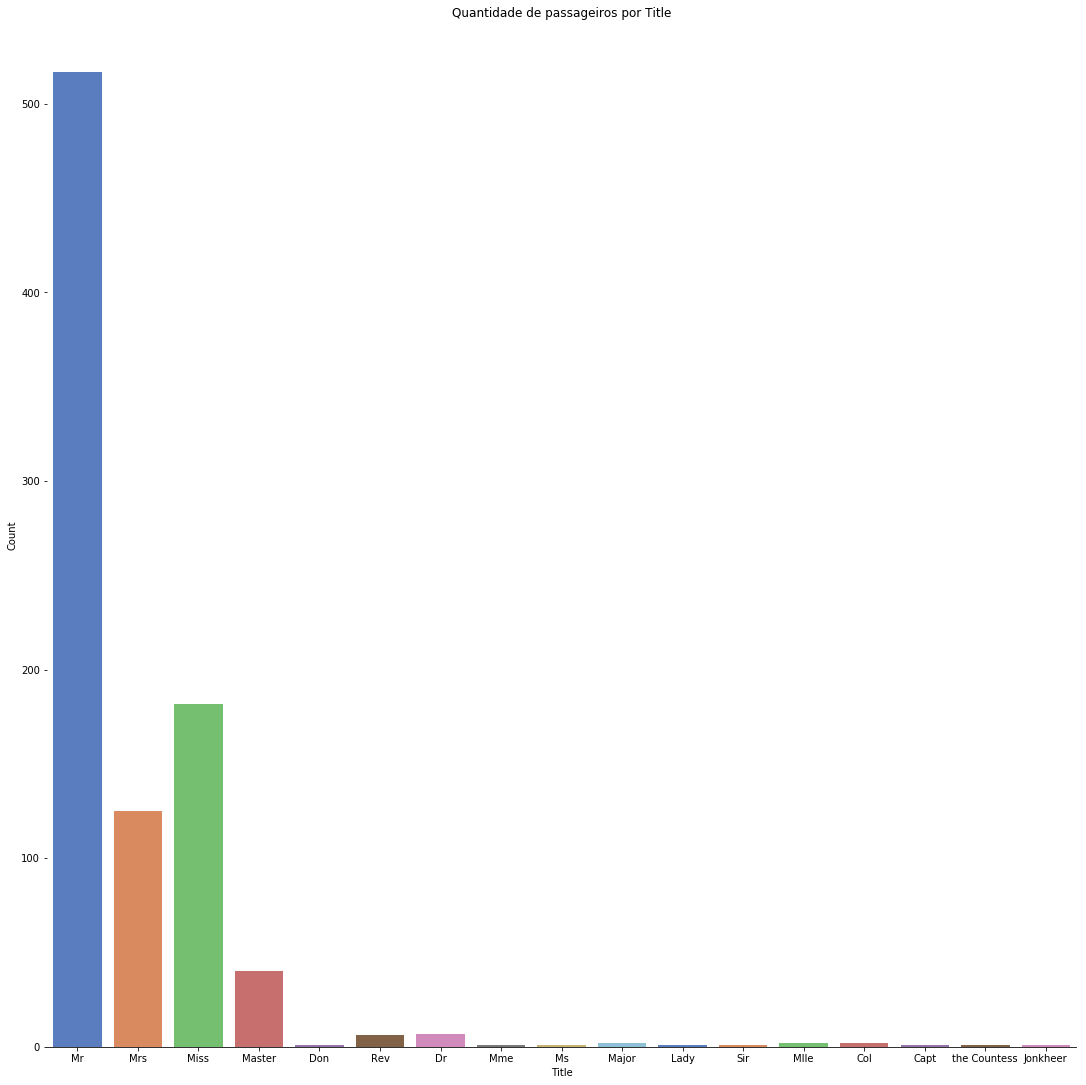

In [217]:
g = sns.factorplot("Title",
                   data=train_csv,
                   size=15, 
                   kind="count", 
                   palette="muted")
g.despine(left=True)
g = g.set_ylabels("Count")
plt.title('Quantidade de passageiros por Title')

* Há uma padrão em Mr, Mrs, Miss e Master
* Vamos agrupar os outros que possuem poucos passageiros

In [219]:
train_csv["Title"] = train_csv["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_csv["Title"] = train_csv["Title"].replace(['Mme','Mlle','Ms'], 'Miss')

Text(0.5, 1.0, 'Quantidade de passageiros por Title')

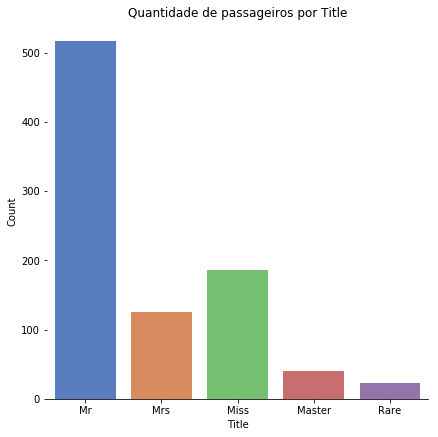

In [230]:
g = sns.factorplot("Title",
                   data=train_csv,
                   size=6, 
                   kind="count", 
                   palette="muted")
g.despine(left=True)
g = g.set_ylabels("Count")
plt.title('Quantidade de passageiros por Title')

In [231]:
train_csv.groupby('Title').Title.count()

Title
Master     40
Miss      186
Mr        517
Mrs       125
Rare       23
Name: Title, dtype: int64

* Master - Homens Jovens
* Miss - é usado antes de sobrenomes ou nomes completos de mulheres que não são casadas. É algo próximo a “senhorita”, em português.

* Mr - Se utiliza antes de sobrenomes ou nomes completos de homens em geral, independente do seu estado civil.
* Mrs- é usado antes de sobrenomes ou nomes completos de mulheres casadas.
* Ms- é usado antes de sobrenomes ou nomes completos de mulheres em geral,independente do seu estado civil




### Input Age por Title e Pclasse , utilzando a Mediana

In [246]:
index_NaN_age = list(train_csv["Age"][train_csv["Age"].isnull()].index)

In [248]:
for i in index_NaN_age :
    age_med = train_csv["Age"].median()
    age_pred = train_csv["Age"][((train_csv['Title']  == train_csv.iloc[i]["Title"]) & 
                                 (train_csv['Pclass'] == train_csv.iloc[i]["Pclass"]))].median()
    
    
    if not np.isnan(age_pred) :
        train_csv['Age'].iloc[i] = age_pred
    else :
        train_csv['Age'].iloc[i] = age_med    

In [249]:
print('Missig Values:')
train_csv.isnull().sum()

Missig Values:


PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             2
Status_Survived      0
Title                0
dtype: int64

Text(0.5, 1.0, 'Distribution of the field Age')

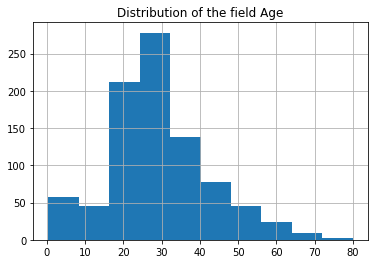

In [252]:
train_csv.Age.hist()
plt.title("Distribution of the field Age")

* A distribuição teve uma leve mudança com pico de passageiros entre 25 e 32 anos aprox.

In [260]:
train_csv.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status_Survived,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Morto,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Vivo,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Vivo,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Vivo,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Morto,Mr


## Input Cabin

 Vamos tentar combinar informações de Ticket e Fare para tentar determinar a Cabin

In [301]:
train_csv['Feature_Ticket']=train_csv['Ticket'].str.strip()